# Step 1: Installation and Setup

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing dataset from kaggle

In [9]:
# list of the datasets
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           3319  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44          11380  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Turnout rates           4KB  2020-11-26 00:21:15           3488  
afrniomelo/3w-dataset                                        3W Dataset - Undesirable events in oil wells   658MB  2020-11-21 21:22:49            510  
arashnic/hr-analytics-job-change-of-data-scientists          HR Analytics: Job Change of

In [10]:
# importing dataset from kaggle
! kaggle competitions download -c santander-customer-satisfaction

  0% 0.00/612k [00:00<?, ?B/s]
100% 612k/612k [00:00<00:00, 89.4MB/s]
  0% 0.00/4.02M [00:00<?, ?B/s]
100% 4.02M/4.02M [00:00<00:00, 132MB/s]
  0% 0.00/4.05M [00:00<?, ?B/s]
100% 4.05M/4.05M [00:00<00:00, 66.2MB/s]


In [ ]:
# unzip datasets
! unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
dataset = pd.read_csv('/content/train.csv')

In [ ]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Step 3: Data Preprocessing

In [ ]:
dataset.shape

(76020, 371)

In [ ]:
# independent variables (Matrix of features)
x = dataset.drop(labels=['ID','TARGET'], axis=1)

In [ ]:
# dependent variable
y = dataset['TARGET']

In [ ]:
x.shape, y.shape

((76020, 369), (76020,))

In [ ]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, x_test.shape

((60816, 369), (15204, 369))

# Step 4: Remove constant, Quasi constant and duplicate features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
rm_f = VarianceThreshold(threshold=0.01)
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

((60816, 266), (15204, 266))

In [ ]:
369-266

103

In [ ]:
# remove duplicate features
x_train_t = x_train.T
x_test_t = x_test.T

In [ ]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [ ]:
x_train_t.shape, x_test_t.shape

((266, 60816), (266, 15204))

In [ ]:
x_train_t.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool

In [ ]:
# number of duplicate features
x_train_t.duplicated().sum()

16

In [ ]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features)

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [ ]:
features_to_keep = [not index for index in duplicated_features]
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [ ]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [ ]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [ ]:
266-250

16

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [ ]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [ ]:
# reshape the dataset
x_train = x_train.reshape(60816, 250, 1)
x_test = x_test.reshape(15204, 250, 1)

In [ ]:
x_train.shape, x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Step 5: Building the model

In [ ]:
# define an object
model = tf.keras.models.Sequential()

In [ ]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape = (250, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# third CNN layer
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# first dense layer (fully connected layer)
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 248, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 64)            0

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

In [ ]:
# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Training the model

In [ ]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 114s 2ms/sample - loss: 0.2341 - accuracy: 0.9504 - val_loss: 0.1945 - val_accuracy: 0.9538
Epoch 2/10
60816/60816 [==============================] - 111s 2ms/sample - loss: 0.1750 - accuracy: 0.9596 - val_loss: 0.1905 - val_accuracy: 0.9579
Epoch 3/10
60816/60816 [==============================] - 111s 2ms/sample - loss: 0.1681 - accuracy: 0.9607 - val_loss: 0.1847 - val_accuracy: 0.9582
Epoch 4/10
60816/60816 [==============================] - 111s 2ms/sample - loss: 0.1639 - accuracy: 0.9609 - val_loss: 0.1821 - val_accuracy: 0.9580
Epoch 5/10
60816/60816 [==============================] - 111s 2ms/sample - loss: 0.1620 - accuracy: 0.9609 - val_loss: 0.1731 - val_accuracy: 0.9583
Epoch 6/10
60816/60816 [==============================] - 113s 2ms/sample - loss: 0.1581 - accuracy: 0.9609 - val_loss: 0.1775 - val_accuracy: 0.9583
Epoch 7/10
60816/60816 [==========================

In [ ]:
# model predictions
y_pred = model.predict_classes(x_test)

In [ ]:
print(y_pred[12]), print(y_test[12])

[0]
0


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import  confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14569     1]
 [  634     0]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)

In [ ]:
print(acc_cm)

0.9582346750855039


# Step 7: Learning Curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

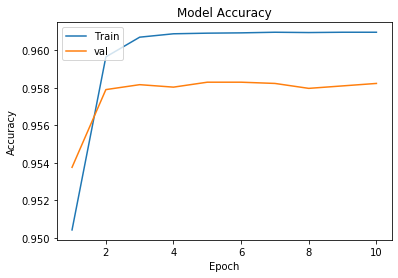

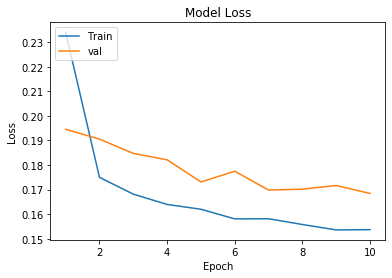

In [ ]:
learning_curve(history, 10)